In [118]:
import pandas as  pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv("amazon_alexa.tsv", sep='\t')
data.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


  ### Performing EDA  on the Dataset

In [120]:
columns=[]
for i in data.columns:
   columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [121]:
data.shape

(3150, 5)

In [122]:
for i  in columns:
 print("No of unique value in ",i ,"is =",len(np.unique(data[i])))

No of unique value in  rating is = 5
No of unique value in  date is = 77
No of unique value in  variation is = 16
No of unique value in  verified_reviews is = 2301
No of unique value in  feedback is = 2


In [123]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [124]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [126]:
data.drop(labels="date", axis=1 ,inplace=True)

In [127]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


### For Converting the object type into int type

In [128]:
from sklearn.preprocessing import  LabelEncoder
data["variation"]=LabelEncoder().fit_transform(data["variation"])

In [129]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


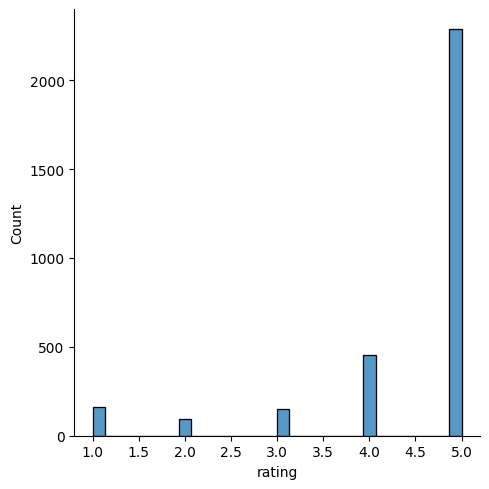

In [130]:
sns.displot(data,x="rating", legend=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

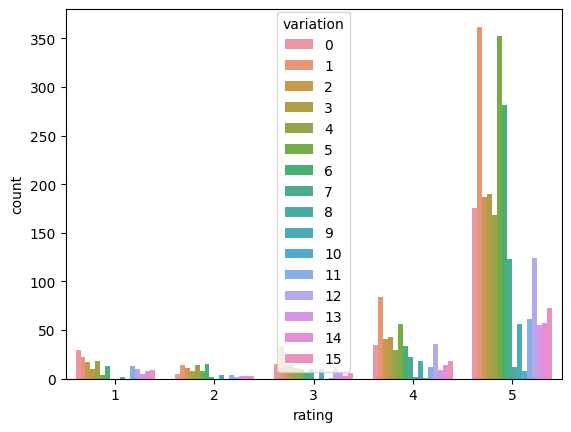

In [131]:
sns.countplot(x="rating" ,hue="variation",data=data)

<AxesSubplot:xlabel='variation', ylabel='count'>

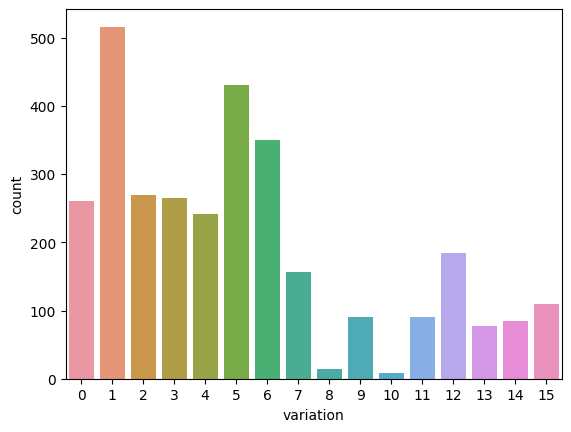

In [132]:
sns.countplot(x='variation',data=data)

<AxesSubplot:xlabel='rating', ylabel='count'>

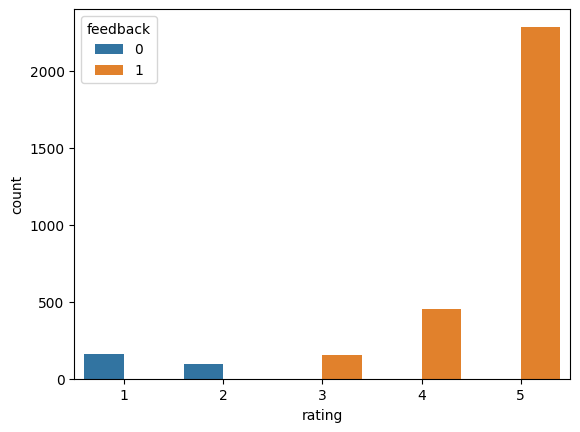

In [133]:
sns.countplot(x="rating", hue="feedback", data=data)

<AxesSubplot:xlabel='variation', ylabel='count'>

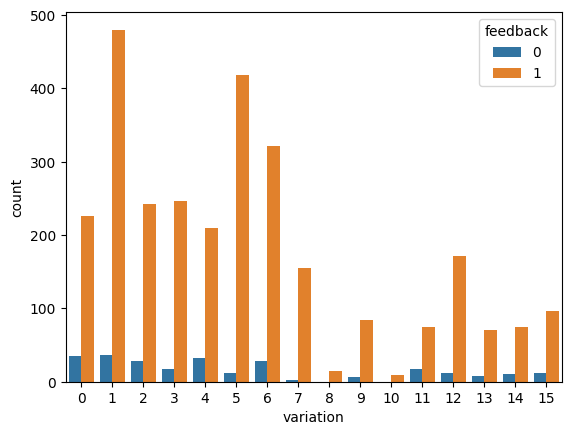

In [134]:
sns.countplot(x="variation", hue="feedback", data=data)

In [135]:
data.drop(labels=['variation','rating'],axis =1 ,inplace = True)


In [136]:
total_value = len(data['feedback'])
positive_comment = []
negative_comment = []

2893 257
percentage of positive comment =  91.84126984126985 %
percentage of negative comment =  8.158730158730158 %


<AxesSubplot:xlabel='feedback', ylabel='count'>

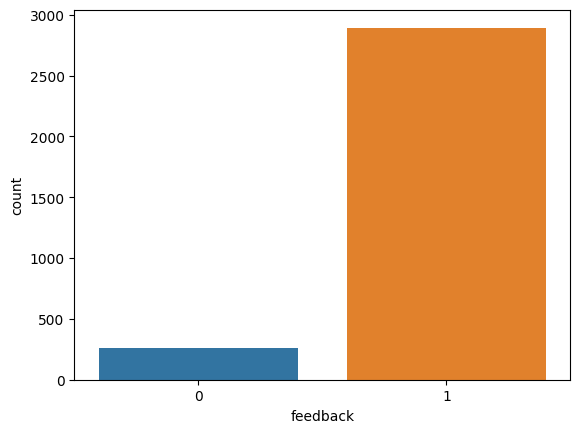

In [137]:
for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

print(len(positive_comment),len(negative_comment))
percent_of_positive_comment = (len(positive_comment)/total_value)*100
percent_of_negative_comment = (len(negative_comment)/total_value)*100

print("percentage of positive comment = ",percent_of_positive_comment,"%")
print("percentage of negative comment = ",percent_of_negative_comment,"%")

sns.countplot(x='feedback',data=data)


In [138]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [151]:
x=data["verified_reviews"]
y=data["feedback"]
x[0]

'Love my Echo!'

### Perform NLP

In [152]:
from tensorflow import keras
from keras_preprocessing.text import  Tokenizer

In [153]:
tokenizer = Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)


In [154]:
x = tokenizer.texts_to_sequences(x)

In [159]:
from keras_preprocessing.sequence import pad_sequences




In [162]:
x_pad=pad_sequences(x,maxlen=80,padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [163]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train , y_test=train_test_split(x_pad, y, test_size=0.33, random_state=42)

In [171]:
from sklearn.ensemble  import  RandomForestClassifier
RandomForest_classifier=RandomForestClassifier(n_estimators=25, criterion='entropy',class_weight={0:6,1:1})
RandomForest_classifier.fit(x_train, y_train)
y_trainprdict=RandomForest_classifier.predict(x_train)
y_predict=RandomForest_classifier.predict(x_test)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [173]:
y_trainprdict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [174]:
y_predict

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [175]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.9105769230769231


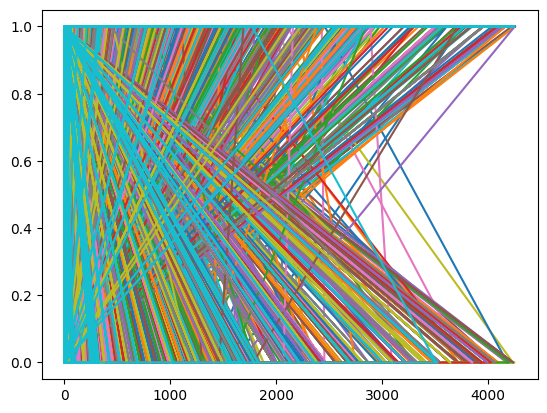

In [ ]:
plt.plot(x_train, RandomForest_classifier.predict(x_train))
plt.show()

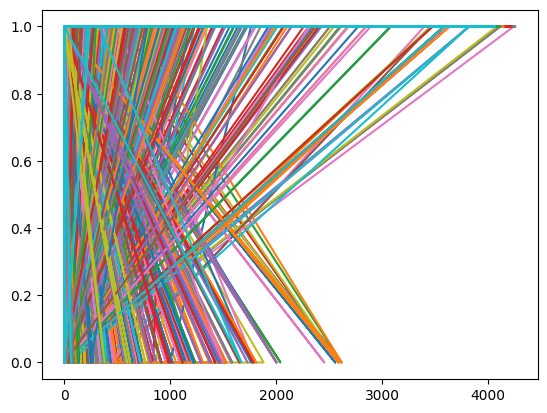

In [184]:
plt.plot(x_test,RandomForest_classifier.predict(x_test))
plt.show()


In [187]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=RandomForest_classifier.predict(sentence_padded)
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a review : ")))

negative feedback
